Задание сделал Мотыка Артем.
# Задача 2. Линейная регрессия, метод градиентного спуска

* **Дедлайн**: 29.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

 - [x] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
 - [x] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
 - [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
 - [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
 - [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
 - [x] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
 - [x] При обучении моделей использовать **масштабирование данных**.
 - [x] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
 - [x] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
 - [x] Повторить тоже самое, но используя **кросс-валидацию**.
 - [x] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
 - [x] (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
 - [x] (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
 - [x] (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
 - [ ] (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

In [282]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

# Dataset

[Car price](https://github.com/rustam-azimov/ml-course-itmo/blob/main/data/car_price/car_price.csv)

Признаки:
*   car_ID	– id авто
*   symboling - уровень безопасности автомобиля (измеряется от -3 до 3, от менее безопасного до безопасного)
*   CarName – название авто
*   fueltype – тип топлива (бензин, дизель)  
*   aspiration – выхлоп (стоковый, турбированный)
*   doornumber - кол-во дверей
*   carbody – седан, хэтчбек, универсал, с жесткой крышей, кабриолет
*   drivewheel – передний, задний, полный
*   enginelocation – передний, задний
*   wheelbase – длина колесной базы
*   carlength – длина автомобиля
*   carwidth – ширина автомобиля
*   carheight – высота автомобиля
*   curbweight – вес автомобиля
*   enginetype - тип двигателя
*   cylindernumber – кол-во цилиндров
*   enginesize – размер двигателя
*   fuelsystem - тип топливной системы
*   boreratio - что-то связанное с цилиндрами двигателя и что-то числовое
*   stroke - такты (что-то связанное с двигателем)
*   compressionratio - степень сжатия (что-то связанное с двигателем)
*   horsepower - лошадиные силы
*   peakrpm - максимальная частота вращения (что-то связанное с двигателем)
*   citympg - расход топлива в городе (мили на голон)
*   highwaympg - расход топлива на трассе (мили на голон)
*   price - цена автомобиля

Можно поставить задачу регрессии, определяя цену автомобиля.


In [283]:
df = pd.read_csv("car_price.csv")

In [284]:
df.shape

(205, 26)

In [285]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,...,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,...,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,...,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


In [286]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,103.00000,0.83415,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,3.32976,3.25541,10.14254,104.11707,5125.12195,25.21951,30.75122,13276.71057
std,59.32256,1.24531,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,0.27084,0.31360,3.97204,39.54417,476.98564,6.54214,6.88644,7988.85233
min,1.00000,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.54000,2.07000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
25%,52.00000,0.00000,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,3.15000,3.11000,8.60000,70.00000,4800.00000,19.00000,25.00000,7788.00000
50%,103.00000,1.00000,97.00000,173.20000,65.50000,54.10000,2414.00000,120.00000,3.31000,3.29000,9.00000,95.00000,5200.00000,24.00000,30.00000,10295.00000
75%,154.00000,2.00000,102.40000,183.10000,66.90000,55.50000,2935.00000,141.00000,3.58000,3.41000,9.40000,116.00000,5500.00000,30.00000,34.00000,16503.00000
max,205.00000,3.00000,120.90000,208.10000,72.30000,59.80000,4066.00000,326.00000,3.94000,4.17000,23.00000,288.00000,6600.00000,49.00000,54.00000,45400.00000


# Data cleaning & EDA

Удалим столбец индексов и столбец названия автомобиля

In [287]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

Посмотрим у каких колонок есть значения null

In [288]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Переведём признак enginelocation из категориального строкового в бинарный числовой.

In [289]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [290]:
df['enginelocation'].replace(['front', 'rear'], [0, 1], inplace=True)

Есть предположение, что признаки связанные с двигателем сильно коррелируют друг с другом. Из-за чего результаты обученной модели могут быть не устойчивыми (проблема мультиколлинеарности).

Для начала переведем признак cylindernumber из строкового формата в числовой.

In [291]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [292]:
df['cylindernumber'].replace(['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], [2, 3, 4, 5, 6, 8, 12], inplace=True)

<Axes: >

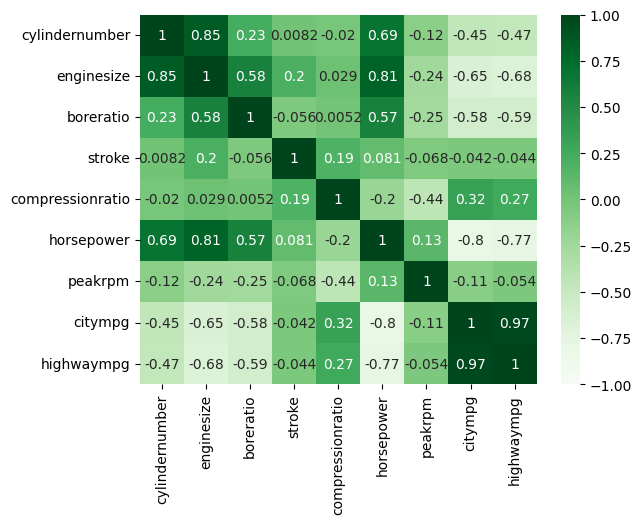

In [293]:
sns.heatmap((df[['cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]).corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

cylindernumber сильно коррелируют с enginesize;
enginesize сильно коррелируют с horsepower;
citympg и highwaympg сильно коррелируют с horsepower;
Поэтому удалим cylindernumber, enginesize, citympg и highwaympg оставив только horsepower.


In [294]:
df.drop(['cylindernumber', 'enginesize', 'citympg', 'highwaympg'], axis=1, inplace=True)

Есть предположение, что признаки связанные с размером авто коррелируют друг с другом.

Сначала переведем признак doornumber из строкового в числовой.

In [295]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [296]:
df['doornumber'].replace(['two', 'four'], [0, 1], inplace=True)

<Axes: >

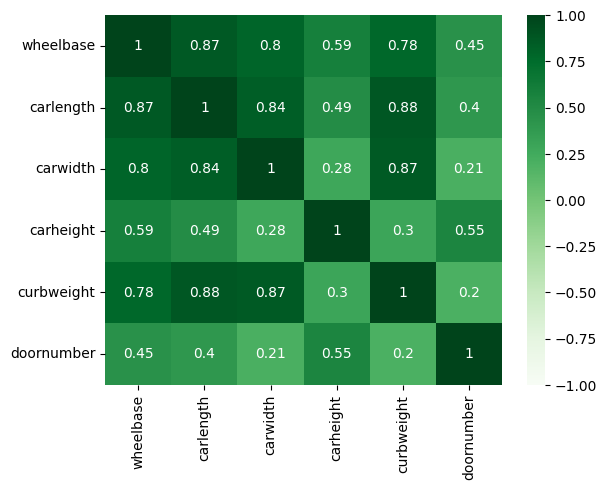

In [297]:
sns.heatmap((df[['wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight', 'doornumber']]).corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

Высота автомобиля и кол-во дверей коррелирует меньше всего, их можно оставить, а из осталных признаков можно сделать один (Feature Engineering)

# Feature Engineering

In [298]:
min_wheelbase = df['wheelbase'].min()
print(min_wheelbase)
max_wheelbase = df['wheelbase'].max()
print(max_wheelbase)
min_carlength = df['carlength'].min()
print(min_carlength)
max_carlength = df['carlength'].max()
print(max_carlength)
min_carwidth = df['carwidth'].min()
print(min_carwidth)
max_carwidth = df['carwidth'].max()
print(max_carwidth)
min_curbweight = df['curbweight'].min()
print(min_curbweight)
max_curbweight = df['curbweight'].max()
print(max_curbweight)

86.6
120.9
141.1
208.1
60.3
72.3
1488
4066


In [299]:
def to_one_feature(feature_vec):
  norm_wheelbase = (feature_vec[0] - min_wheelbase) / (max_wheelbase - min_wheelbase)
  norm_carlength = (feature_vec[1] - min_carlength) / (max_carlength - min_carlength)
  norm_carwidth = (feature_vec[2] - min_carwidth) / (max_carwidth - min_carwidth)
  norm_curbweight = (feature_vec[3] - min_curbweight) / (max_curbweight - min_curbweight)
  return (norm_wheelbase + norm_carlength + norm_carwidth + norm_curbweight) / 4

df['car_size'] = df[['wheelbase', 'carlength', 'carwidth', 'curbweight']].apply(to_one_feature, axis=1)

In [300]:
df['car_size'].describe()

count   205.00000
mean      0.43191
std       0.17361
min       0.01312
25%       0.29754
50%       0.39697
75%       0.52184
max       0.97140
Name: car_size, dtype: float64

In [301]:
df.drop(['wheelbase', 'carlength', 'carwidth', 'curbweight'], axis=1, inplace=True)

In [302]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_size
0,3,gas,std,0,convertible,rwd,0,48.80000,dohc,mpfi,3.47000,2.68000,9.00000,111,5000,13495.00000,0.29989
1,3,gas,std,0,convertible,rwd,0,48.80000,dohc,mpfi,3.47000,2.68000,9.00000,111,5000,16500.00000,0.29989
2,1,gas,std,0,hatchback,rwd,0,52.40000,ohcv,mpfi,2.68000,3.47000,9.00000,154,5000,16500.00000,0.40769
3,2,gas,std,1,sedan,fwd,0,54.30000,ohc,mpfi,3.19000,3.40000,10.00000,102,5500,13950.00000,0.43392
4,2,gas,std,1,sedan,4wd,0,54.30000,ohc,mpfi,3.19000,3.40000,8.00000,115,5500,17450.00000,0.48240


Нужно перевести категориальные признаки в числовые (one-hot encoding)

In [303]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [304]:
df['fueltype'].replace(['gas', 'diesel'], [0, 1], inplace=True)

In [305]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [306]:
df['aspiration'].replace(['std', 'turbo'], [0, 1], inplace=True)

In [307]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [308]:
one_hot = pd.get_dummies(df['carbody'])
df.drop('carbody', axis = 1, inplace=True)
df = df.join(one_hot)

In [309]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [310]:
one_hot = pd.get_dummies(df['drivewheel'])
df.drop('drivewheel', axis = 1, inplace=True)
df = df.join(one_hot)

In [311]:
df['enginelocation'].value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

In [312]:
df['aspiration'].replace(['front', 'rear'], [0, 1], inplace=True)

In [313]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [314]:
one_hot = pd.get_dummies(df['enginetype'])
df.drop('enginetype', axis = 1, inplace=True)
df = df.join(one_hot)

In [315]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [316]:
one_hot = pd.get_dummies(df['fuelsystem'])
df.drop('fuelsystem', axis = 1, inplace=True)
df = df.join(one_hot)

In [317]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,horsepower,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,0,48.80000,3.47000,2.68000,9.00000,111,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,48.80000,3.47000,2.68000,9.00000,111,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,52.40000,2.68000,3.47000,9.00000,154,...,1,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,54.30000,3.19000,3.40000,10.00000,102,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,54.30000,3.19000,3.40000,8.00000,115,...,0,0,0,0,0,0,0,1,0,0


In [318]:
df.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,horsepower,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,...,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.83415,0.09756,0.18049,0.56098,0.01463,53.72488,3.32976,3.25541,10.14254,104.11707,...,0.06341,0.01951,0.05366,0.32195,0.01463,0.09756,0.00488,0.45854,0.04390,0.00488
std,1.24531,0.29745,0.38553,0.49748,0.12038,2.44352,0.27084,0.31360,3.97204,39.54417,...,0.24430,0.13866,0.22589,0.46837,0.12038,0.29745,0.06984,0.49950,0.20538,0.06984
min,-2.00000,0.00000,0.00000,0.00000,0.00000,47.80000,2.54000,2.07000,7.00000,48.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,52.00000,3.15000,3.11000,8.60000,70.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,0.00000,0.00000,1.00000,0.00000,54.10000,3.31000,3.29000,9.00000,95.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,2.00000,0.00000,0.00000,1.00000,0.00000,55.50000,3.58000,3.41000,9.40000,116.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
max,3.00000,1.00000,1.00000,1.00000,1.00000,59.80000,3.94000,4.17000,23.00000,288.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Реализация градиентного спуска

In [319]:
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def _with_ones_vec(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)

    ones_vec = np.ones((samples_matrix.shape[0], 1))
    return np.hstack([ones_vec, samples_matrix])

def linear_model(w, x):
    return np.matmul(_with_ones_vec(x), w)

In [320]:
from numpy.linalg import norm

class GDLinearRegressionMSEL2:
    def __init__(self, tol=1E-4, alphaL2=1, step_coef=1E-2):
        self.coef_=None
        self.tol=tol
        self.alphaL2=alphaL2
        self.step_coef = step_coef

    def fit(self, X, y):
        features_num = np.shape(X)[1]
        X_sample = _with_ones_vec(X)
        self.coef_ = np.random.randn(features_num + 1, )
        while True:
            y_pred = np.dot(X_sample, self.coef_)
            error = y_pred - y
            grad = (np.dot(X_sample.T, error) + self.alphaL2 * self.coef_) / X_sample.shape[0]
            diff = self.step_coef * grad
            self.coef_ = self.coef_ - diff
            if (norm(diff) < self.tol):
                break

# Реализация стохастического градиентного спуска

In [321]:
class SGDLinearRegressionMSEL2:
    def __init__(self, tol=1E-4, alphaL2=1, step_coef=1E-2, iterations_cnt=1000):
        self.coef_=None
        self.tol=tol
        self.alphaL2=alphaL2
        self.step_coef = step_coef
        self.iterations_cnt = iterations_cnt
    def fit(self, X, y):
        samples_num = np.shape(X)[0]
        features_num = np.shape(X)[1]
        X = np.concatenate((np.ones((samples_num, 1)), X), axis=1)
        self.coef_ = np.random.randn(features_num + 1).reshape(features_num + 1, 1)
        for _ in range(self.iterations_cnt):
            for start in range(samples_num):
                rnd_i = np.random.randint(0, samples_num)
                x_batch, y_batch = X[rnd_i, :].reshape(1, features_num + 1), y[rnd_i].reshape(1, 1)
                y_pred = np.dot(x_batch, self.coef_)
                error = y_pred - y_batch
                grad = (np.dot(x_batch.T, error) + self.alphaL2 * self.coef_) / x_batch.shape[0]
                diff = self.step_coef * grad
                self.coef_ = self.coef_ - diff
                if (norm(diff) < self.tol):
                    break

# Разбиение выборки на train&test

In [322]:
from sklearn.model_selection import train_test_split

y = df["price"]
X = df.drop(["price"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков

In [323]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)
x_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,horsepower,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,-0.72738,3.15172,-0.46348,0.91799,-0.13650,0.27678,0.40584,1.21510,3.09986,-0.81539,...,-0.25482,-0.13650,-0.25482,-0.67181,-0.11111,3.15172,-0.07833,-0.95235,-0.19487,-0.07833
1,-0.72738,-0.31729,-0.46348,0.91799,-0.13650,1.20727,0.51738,-3.36017,-0.43959,-0.24189,...,-0.25482,-0.13650,-0.25482,-0.67181,-0.11111,-0.31729,-0.07833,1.05003,-0.19487,-0.07833
2,-0.72738,-0.31729,-0.46348,0.91799,-0.13650,2.17822,-1.00711,-0.70967,-0.28344,-1.06473,...,-0.25482,-0.13650,-0.25482,1.48852,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487,-0.07833
3,0.07864,-0.31729,-0.46348,0.91799,-0.13650,0.31724,-0.63528,0.11073,-0.17934,-0.89019,...,-0.25482,-0.13650,-0.25482,1.48852,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487,-0.07833
4,-0.72738,-0.31729,-0.46348,-1.08934,-0.13650,-0.16824,-0.63528,1.02578,-0.28344,-0.46630,...,-0.25482,-0.13650,3.92428,-0.67181,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487,-0.07833


# Нахождение налучшего кол-ва и подмножества признаков

In [324]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator=LinearRegression())
rfecv.fit(x_train, y_train)

print("Оптимальное число признаков: ", rfecv.n_features_)
print("Выбранные признаки: ", *x_train.columns[rfecv.support_])
rfecv.support_

Оптимальное число признаков:  28
Выбранные признаки:  symboling fueltype aspiration doornumber enginelocation carheight boreratio stroke compressionratio horsepower car_size convertible hardtop hatchback sedan wagon fwd dohcv l ohc ohcv rotor 1bbl 4bbl idi mfi mpfi spdi


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False])

In [325]:
x_train = x_train.iloc[:, rfecv.support_.tolist()]
x_test = x_test.iloc[:, rfecv.support_.tolist()]
x_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,boreratio,stroke,compressionratio,horsepower,...,l,ohc,ohcv,rotor,1bbl,4bbl,idi,mfi,mpfi,spdi
0,-0.72738,3.15172,-0.46348,0.91799,-0.13650,0.27678,0.40584,1.21510,3.09986,-0.81539,...,-0.26813,0.64327,-0.25482,-0.13650,-0.25482,-0.11111,3.15172,-0.07833,-0.95235,-0.19487
1,-0.72738,-0.31729,-0.46348,0.91799,-0.13650,1.20727,0.51738,-3.36017,-0.43959,-0.24189,...,3.72949,-1.55456,-0.25482,-0.13650,-0.25482,-0.11111,-0.31729,-0.07833,1.05003,-0.19487
2,-0.72738,-0.31729,-0.46348,0.91799,-0.13650,2.17822,-1.00711,-0.70967,-0.28344,-1.06473,...,-0.26813,0.64327,-0.25482,-0.13650,-0.25482,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487
3,0.07864,-0.31729,-0.46348,0.91799,-0.13650,0.31724,-0.63528,0.11073,-0.17934,-0.89019,...,-0.26813,0.64327,-0.25482,-0.13650,-0.25482,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487
4,-0.72738,-0.31729,-0.46348,-1.08934,-0.13650,-0.16824,-0.63528,1.02578,-0.28344,-0.46630,...,-0.26813,0.64327,-0.25482,-0.13650,3.92428,-0.11111,-0.31729,-0.07833,-0.95235,-0.19487


# Подбор гиперпараметров

In [326]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-4, 4, 10)
tol_grid = np.logspace(-4, 4, 10)

searcher = GridSearchCV(
    Ridge(),
    [{"alpha": alpha_grid, "tol": tol_grid}],
    scoring="neg_root_mean_squared_error",
    cv=5,
)
searcher.fit(x_train, y_train)

optimal_alpha = searcher.best_params_["alpha"]
optimal_tol = searcher.best_params_["tol"]

print("Best alpha = %.4f" % optimal_alpha)
print("Best tol = %.4f" % optimal_tol)

Best alpha = 0.3594
Best tol = 0.0001


# Обучение своей модели градиентного спуска

In [327]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

def print_results(y_train_pred, y_test_pred):
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
    print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=True))
    print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=True))
    print("Test MAE = %.4f" % mean_absolute_error(y_test, y_test_pred))
    print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
    print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_test_pred))
    print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_pred))
    print("Test R^2 = %.4f" % r2_score(y_test, y_test_pred))
    print("Train R^2 = %.4f" % r2_score(y_train, y_train_pred))

In [328]:
my_gd_model = GDLinearRegressionMSEL2(alphaL2=optimal_alpha, tol=optimal_tol)
my_gd_model.fit(x_train, y_train)
my_gd_model.coef_

array([13194.50086738,   391.73862485,  1937.98069171,  -368.36324483,
        -323.20806339,  2119.30659394,  -268.50113654,  -609.11333895,
        -621.46150848, -3612.5333869 ,  2491.19700074,  5644.07228954,
         923.80277938,   226.1882579 ,  -383.17888828,   322.66420386,
        -599.97116812,  -761.34640997,   221.27159206, -1265.97181095,
         639.10699902,   547.73147302,   423.07754189,   379.32268698,
        -212.5053154 ,  1937.89879204,  -231.64467244,  -779.73491699,
        -589.23180024])

In [329]:
y_train_pred1 = linear_model(my_gd_model.coef_, x_train)
y_test_pred1 = linear_model(my_gd_model.coef_, x_test)

print_results(y_train_pred1, y_test_pred1)

Test RMSE = 4288.1153
Train RMSE = 2415.6829
Test MSE = 18387933.0863
Train MSE = 5835524.0231
Test MAE = 2991.5927
Train MAE = 1821.8666
Test MAPE = 0.2866
Train MAPE = 0.1532
Test R^2 = 0.7671
Train R^2 = 0.9022


# Обучение библиотечной модели Ridge

In [330]:
model = Ridge(alpha=optimal_alpha, tol=optimal_tol)

model.fit(x_train, y_train)
y_train_pred2 = model.predict(x_train)
y_test_pred2 = model.predict(x_test)
model.coef_

array([  391.74029591,  1938.3695408 ,  -368.42910117,  -323.20754488,
        2119.30146234,  -268.52989987,  -609.12462832,  -621.50697171,
       -3613.33787585,  2491.25021241,  5644.05157841,   923.8660927 ,
         226.25795823,  -382.9936954 ,   322.87408022,  -599.83410719,
        -761.33108245,   221.27288765, -1266.00014866,   639.12346522,
         547.71884469,   423.08333482,   379.33515193,  -212.50011555,
        1938.3695408 ,  -231.66391683,  -779.73313871,  -589.27651936])

In [331]:
print_results(y_train_pred2, y_test_pred2)

Test RMSE = 4281.9169
Train RMSE = 2415.5056
Test MSE = 18334812.0330
Train MSE = 5834667.4195
Test MAE = 2988.0619
Train MAE = 1821.2426
Test MAPE = 0.2861
Train MAPE = 0.1531
Test R^2 = 0.7677
Train R^2 = 0.9022


# Обучение своей модели стохастического градиентного спуска

In [332]:
my_sgd_model = SGDLinearRegressionMSEL2(alphaL2=optimal_alpha, tol=optimal_tol/2, iterations_cnt=4000*5)
my_sgd_model.fit(x_train.to_numpy(), y_train.to_numpy())
my_sgd_model.coef_

array([[9618.92063386],
       [-291.04412582],
       [ 148.17434569],
       [ 317.22644503],
       [ -13.17444359],
       [ 847.69366629],
       [-460.74311608],
       [ -39.73612461],
       [-141.69765153],
       [ 244.70703893],
       [1694.8869508 ],
       [2272.79439593],
       [ 371.3305018 ],
       [ -79.36725513],
       [-411.24998738],
       [ 453.99385963],
       [-274.27221267],
       [-922.97801532],
       [-546.49216413],
       [-207.91900681],
       [ 114.70982416],
       [ 436.93494578],
       [ 452.23572334],
       [ 354.82899266],
       [ 110.09144021],
       [ 148.17434569],
       [  38.57092442],
       [ 435.01665929],
       [ 119.72836249]])

In [333]:
y_train_pred3 = linear_model(my_sgd_model.coef_, x_train)
y_test_pred3 = linear_model(my_sgd_model.coef_, x_test)
y_test_pred3 = y_test_pred3.reshape(y_test_pred3.shape[0],)

print_results(y_train_pred3, y_test_pred3)

Test RMSE = 6535.1152
Train RMSE = 5401.0351
Test MSE = 42707731.0399
Train MSE = 29171180.3995
Test MAE = 4421.0988
Train MAE = 3716.5364
Test MAPE = 0.3216
Train MAPE = 0.2667
Test R^2 = 0.4590
Train R^2 = 0.5109


Можно видеть, что модель стохастического спуска обучается значительно хуже, чем первые две. Вероятнее всего, качество поможет улучшить увеличение числа итераций, однако из-за этого значительно повышается время обучения

# Визуализация результатов

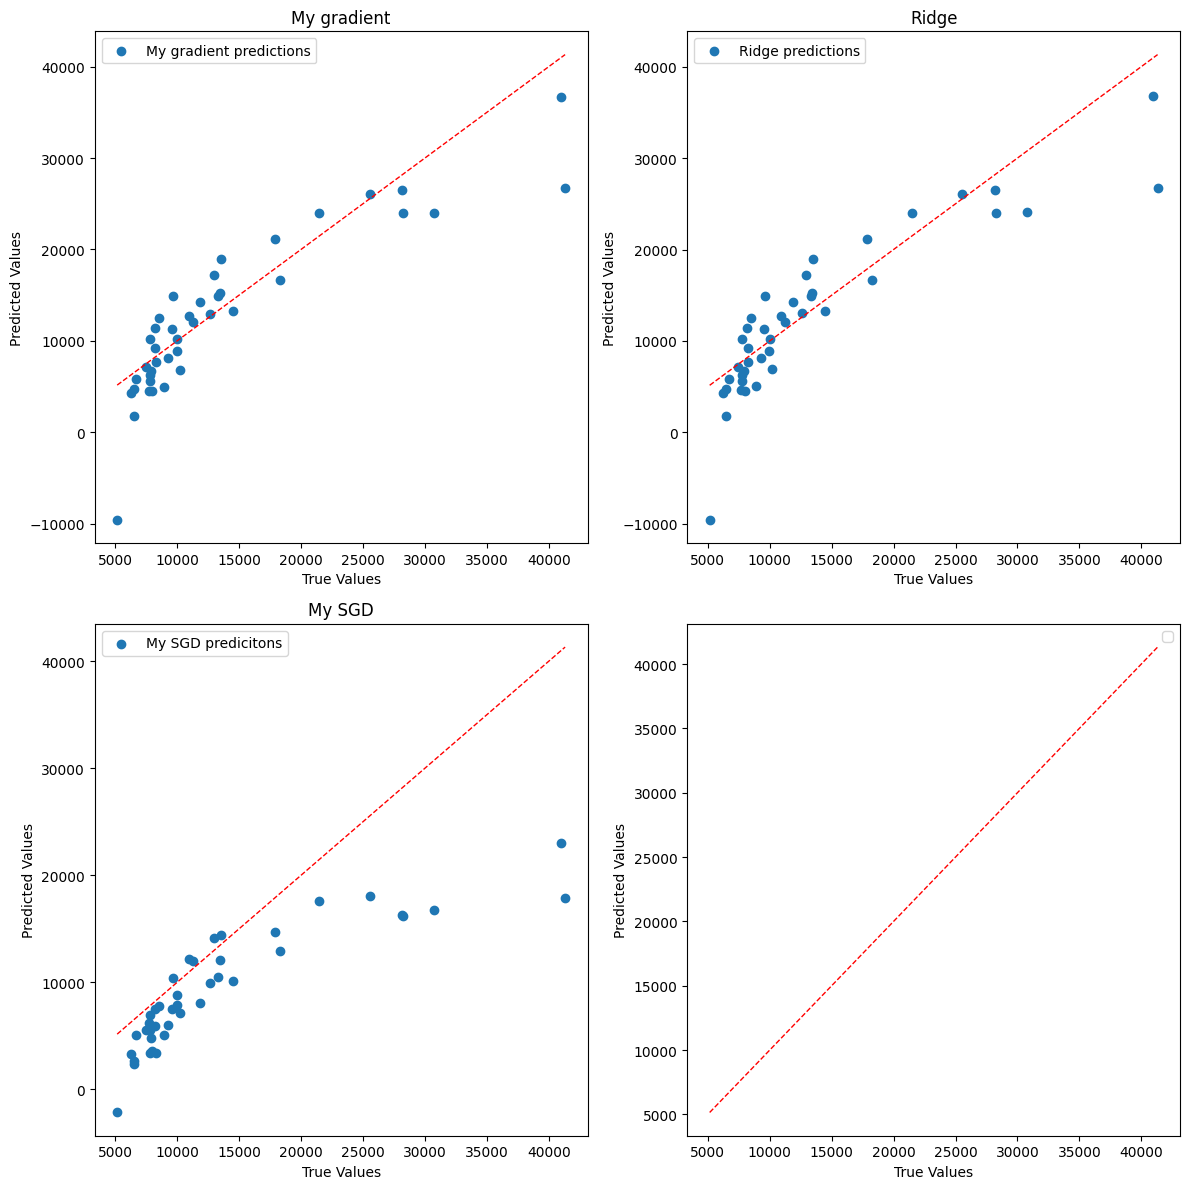

In [334]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.ravel()

ax[0].scatter(y_test, y_test_pred1, label="My gradient predictions")
ax[0].set_title("My gradient")

ax[1].scatter(y_test, y_test_pred2, label="Ridge predictions")
ax[1].set_title("Ridge")

ax[2].scatter(y_test, y_test_pred3, label="My SGD predicitons")
ax[2].set_title("My SGD")

for a in ax:
    a.set_xlabel("True Values")
    a.set_ylabel("Predicted Values")
    a.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linewidth=1, ls="--")
    a.legend()

plt.tight_layout()
plt.show()

Можно видеть, что для собственная реализация градиентного спуска показывает почти индентичные результаты с Ridge

# Кросс-валидация и таблица результатов

Собственный градиентный спуск

In [335]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=5)

results = pd.DataFrame(index=[
    'mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'
])

splited_samples = fold.split(X=x_train, y=y_train)

model = GDLinearRegressionMSEL2(alphaL2=optimal_alpha, tol=optimal_tol)

for fold_i, (train_i, test_i) in enumerate(splited_samples):
    cur_x_train = x_train.iloc[train_i, :]
    cur_x_test = x_train.iloc[test_i, :]
    cur_y_train = y_train.iloc[train_i]
    cur_y_test = y_train.iloc[test_i]

    model.fit(cur_x_train, cur_y_train)
    cur_w = model.coef_

    y_predf_train = linear_model(cur_w, cur_x_train)
    y_predf_test = linear_model(cur_w, cur_x_test)

    mse_train = mean_squared_error(cur_y_train, y_predf_train, squared=True)
    mse_test = mean_squared_error(cur_y_test, y_predf_test, squared=True)

    rmse_train = mean_squared_error(cur_y_train, y_predf_train, squared=False)
    rmse_test = mean_squared_error(cur_y_test, y_predf_test, squared=False)

    r2_train = r2_score(cur_y_train, y_predf_train)
    r2_test = r2_score(cur_y_test, y_predf_test)

    results.insert(loc=fold_i, column=f"Fold{fold_i + 1}", value=[
        mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test
    ])

results["E"] = results.mean(axis=1)
results["STD"] = results.std(axis=1)

results

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,5331510.12951,6114460.54351,6269125.22077,5527324.73929,4306276.32874,5509739.39236,696096.65523
mse-test,13234428.93101,6095136.75959,6050836.69695,8048251.55835,23154348.24591,11316600.43836,6472779.84197
rmse-train,2309.00631,2472.74353,2503.82212,2351.02632,2075.15694,2342.35104,152.08874
rmse-test,3637.91547,2468.83308,2459.84485,2836.94405,4811.89653,3243.08680,893.86155
r2-train,0.91605,0.90288,0.90140,0.90296,0.91506,0.90767,0.00647
r2-test,0.68781,0.86880,0.85022,0.88218,0.75040,0.80788,0.07582


Библиотечная модель

In [337]:
from sklearn.model_selection import cross_val_score

model = Ridge(alpha=optimal_alpha, tol=optimal_tol)
results = pd.DataFrame(index=['mse', 'rmse', 'mape', 'mae', 'r2'])
cv_mse = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
cv_mape = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
cv_mae = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
cv_r2 = cross_val_score(model, x_train, y_train, cv=5, scoring="r2")

for i in range(cv_mse.size):
    results.insert(i, f"Fold {i + 1}", [-cv_mse[i], -cv_rmse[i], -cv_mape[i], -cv_mae[i], cv_r2[i]])

mean = results.mean(axis=1)
std = results.std(axis=1)
results['Mean'] = mean
results['STD'] = std
results

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
mse,9992418.90027,6070824.81192,6169240.95252,8059697.88975,17730147.48490,9604466.00787,4817958.76732
rmse,3161.07876,2463.90438,2483.79567,2838.96071,4210.71817,3031.69154,718.77711
mape,3161.07876,2463.90438,2483.79567,2838.96071,4210.71817,3031.69154,718.77711
mae,3161.07876,2463.90438,2483.79567,2838.96071,4210.71817,3031.69154,718.77711
r2,0.76429,0.86933,0.84729,0.88201,0.80887,0.83436,0.04801


Собственный стохастический градиентный спуск

In [338]:
fold = KFold(n_splits=5)

results = pd.DataFrame(index=[
    'mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'
])

splited_samples = fold.split(X=x_train, y=y_train)

model = SGDLinearRegressionMSEL2(alphaL2=optimal_alpha, tol=optimal_tol)

for fold_i, (train_i, test_i) in enumerate(splited_samples):
    cur_x_train = x_train.iloc[train_i, :]
    cur_x_test = x_train.iloc[test_i, :]
    cur_y_train = y_train.iloc[train_i]
    cur_y_test = y_train.iloc[test_i]

    model.fit(cur_x_train.to_numpy(), cur_y_train.to_numpy())
    cur_w = model.coef_

    y_predf_train = linear_model(cur_w, cur_x_train)
    y_predf_test = linear_model(cur_w, cur_x_test)

    mse_train = mean_squared_error(cur_y_train, y_predf_train, squared=True)
    mse_test = mean_squared_error(cur_y_test, y_predf_test, squared=True)

    rmse_train = mean_squared_error(cur_y_train, y_predf_train, squared=False)
    rmse_test = mean_squared_error(cur_y_test, y_predf_test, squared=False)

    r2_train = r2_score(cur_y_train, y_predf_train)
    r2_test = r2_score(cur_y_test, y_predf_test)

    results.insert(loc=fold_i, column=f"Fold{fold_i + 1}", value=[
        mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test
    ])

results["E"] = results.mean(axis=1)
results["STD"] = results.std(axis=1)

results

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,22060128.42815,25546650.41094,24931037.91165,30529233.85249,23231140.35562,25259638.19177,2908974.34792
mse-test,29700410.06746,22796653.05571,21955928.13221,51899708.61812,67782288.00040,38826997.57478,18078739.70563
rmse-train,4696.82110,5054.36944,4993.09903,5525.32658,4819.86933,5017.89710,283.45534
rmse-test,5449.80826,4774.58407,4685.71533,7204.14524,8232.99994,6069.45057,1410.23664
r2-train,0.65264,0.59423,0.60787,0.46400,0.54178,0.57210,0.06459
r2-test,0.29939,0.50931,0.45653,0.24023,0.26932,0.35495,0.10745


# Выводы

Реализованная модель линейной регрессии с градиентным спуском практически совпадает с библиотечной моделью, но всё же немного отстаёт на кросс-валидации